In [5]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# 정규화 함수 
def MinMaxScaler(data):
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom

# 정규화 되돌리기 함수 
def back_MinMax(data,value):
    diff = np.max(data,0)-np.min(data,0)
    back = value * diff + np.min(data,0)
    return back 

# 데이터 불러오기 
path = "C:\\Users\\김희준\\"
xy = np.loadtxt(path+"data-02-stock_daily.csv", delimiter=",", skiprows=0+1+1)
xy = xy[::-1] # 역순으로 저장 

In [6]:
xy

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

<IPython.core.display.Javascript object>


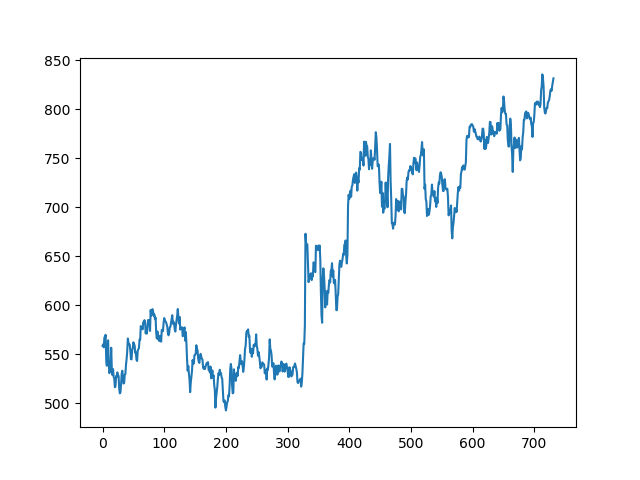

(732, 5)


In [7]:
%matplotlib notebook
plt.plot(xy[:,4]) # 전체 종가
print(xy.shape)

In [8]:
seqLength = 7 # window size 
dataDim = 5 # 시가, 고가, 저가, 거래량 , 종가
hiddenDim = 10 
outputDim = 1
lr = 0.01
iterations = 500

trainSize = int(len(xy)*0.7)
trainSet = xy[0:trainSize]
testSet = xy[trainSize-seqLength:]

trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)


# 7일간의 5가지 데이터(시가, 종가, 고가, 저가, 거래량)를 받아와서 
# 바로 다음 날의 종가를 예측하는 모델로 구성

def buildDataSet(timeSeries, seqLength):
    xdata = []
    ydata = [] 
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength,:-1]
        ty = timeSeries[i+seqLength,[-1]]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)
    
trainX, trainY=buildDataSet(trainSet, seqLength)
testX, testY=buildDataSet(testSet, seqLength)

In [9]:
# 모델 구성 

# First, let's define a RNN Cell, as a layer subclass.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, 
                           activation='tanh',
                           input_shape=[7,4]))

model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                150       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 학습과정 설정 
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 모델 트레이닝 
hist = model.fit(trainX, trainY, epochs=1000, batch_size=16)

Train on 505 samples
Epoch 1/1000
505/505 [==============================] - 3s 5ms/sample - loss: 0.0760 - mae: 0.2064
Epoch 2/1000
505/505 [==============================] - 0s 233us/sample - loss: 0.0217 - mae: 0.1121
Epoch 3/1000
505/505 [==============================] - 0s 215us/sample - loss: 0.0141 - mae: 0.0903
Epoch 4/1000
505/505 [==============================] - 0s 211us/sample - loss: 0.0107 - mae: 0.0764
Epoch 5/1000
505/505 [==============================] - 0s 207us/sample - loss: 0.0086 - mae: 0.0670
Epoch 6/1000
505/505 [==============================] - 0s 199us/sample - loss: 0.0072 - mae: 0.0607
Epoch 7/1000
505/505 [==============================] - 0s 215us/sample - loss: 0.0062 - mae: 0.0555
Epoch 8/1000
505/505 [==============================] - 0s 225us/sample - loss: 0.0055 - mae: 0.0528
Epoch 9/1000
505/505 [==============================] - 0s 253us/sample - loss: 0.0051 - mae: 0.0507
Epoch 10/1000
505/505 [==============================] - 0s 233us/sample

505/505 [==============================] - 0s 239us/sample - loss: 0.0017 - mae: 0.0289
Epoch 74/1000
505/505 [==============================] - 0s 253us/sample - loss: 0.0017 - mae: 0.0284
Epoch 75/1000
505/505 [==============================] - 0s 231us/sample - loss: 0.0017 - mae: 0.0288
Epoch 76/1000
505/505 [==============================] - 0s 278us/sample - loss: 0.0016 - mae: 0.0287
Epoch 77/1000
505/505 [==============================] - 0s 249us/sample - loss: 0.0017 - mae: 0.0285
Epoch 78/1000
505/505 [==============================] - 0s 247us/sample - loss: 0.0017 - mae: 0.0286
Epoch 79/1000
505/505 [==============================] - 0s 263us/sample - loss: 0.0017 - mae: 0.0291
Epoch 80/1000
505/505 [==============================] - 0s 233us/sample - loss: 0.0016 - mae: 0.0284
Epoch 81/1000
505/505 [==============================] - 0s 251us/sample - loss: 0.0017 - mae: 0.0282
Epoch 82/1000
505/505 [==============================] - 0s 227us/sample - loss: 0.0016 - mae: 0

505/505 [==============================] - 0s 217us/sample - loss: 0.0015 - mae: 0.0268
Epoch 153/1000
505/505 [==============================] - 0s 215us/sample - loss: 0.0014 - mae: 0.0261
Epoch 154/1000
505/505 [==============================] - 0s 213us/sample - loss: 0.0014 - mae: 0.0259
Epoch 155/1000
505/505 [==============================] - 0s 211us/sample - loss: 0.0015 - mae: 0.0264
Epoch 156/1000
505/505 [==============================] - 0s 231us/sample - loss: 0.0014 - mae: 0.0262
Epoch 157/1000
505/505 [==============================] - 0s 393us/sample - loss: 0.0015 - mae: 0.0271
Epoch 158/1000
505/505 [==============================] - 0s 221us/sample - loss: 0.0014 - mae: 0.0261
Epoch 159/1000
505/505 [==============================] - 0s 213us/sample - loss: 0.0014 - mae: 0.0261
Epoch 160/1000
505/505 [==============================] - 0s 259us/sample - loss: 0.0014 - mae: 0.0264
Epoch 161/1000
505/505 [==============================] - 0s 215us/sample - loss: 0.0015

Epoch 231/1000
505/505 [==============================] - 0s 371us/sample - loss: 0.0013 - mae: 0.0256
Epoch 232/1000
505/505 [==============================] - 0s 316us/sample - loss: 0.0013 - mae: 0.0251
Epoch 233/1000
505/505 [==============================] - 0s 261us/sample - loss: 0.0014 - mae: 0.0265
Epoch 234/1000
505/505 [==============================] - 0s 267us/sample - loss: 0.0013 - mae: 0.0251
Epoch 235/1000
505/505 [==============================] - 0s 278us/sample - loss: 0.0014 - mae: 0.0262
Epoch 236/1000
505/505 [==============================] - 0s 292us/sample - loss: 0.0013 - mae: 0.0252
Epoch 237/1000
505/505 [==============================] - 0s 286us/sample - loss: 0.0014 - mae: 0.0263
Epoch 238/1000
505/505 [==============================] - 0s 233us/sample - loss: 0.0015 - mae: 0.0269
Epoch 239/1000
505/505 [==============================] - 0s 243us/sample - loss: 0.0013 - mae: 0.0256
Epoch 240/1000
505/505 [==============================] - 0s 263us/sample

505/505 [==============================] - 0s 277us/sample - loss: 0.0013 - mae: 0.0250
Epoch 311/1000
505/505 [==============================] - 0s 213us/sample - loss: 0.0013 - mae: 0.0251
Epoch 312/1000
505/505 [==============================] - 0s 213us/sample - loss: 0.0013 - mae: 0.0262
Epoch 313/1000
505/505 [==============================] - 0s 251us/sample - loss: 0.0013 - mae: 0.0247
Epoch 314/1000
505/505 [==============================] - 0s 233us/sample - loss: 0.0013 - mae: 0.0250
Epoch 315/1000
505/505 [==============================] - 0s 233us/sample - loss: 0.0013 - mae: 0.0247
Epoch 316/1000
505/505 [==============================] - 0s 231us/sample - loss: 0.0012 - mae: 0.0250
Epoch 317/1000
505/505 [==============================] - 0s 245us/sample - loss: 0.0013 - mae: 0.0253
Epoch 318/1000
505/505 [==============================] - 0s 229us/sample - loss: 0.0013 - mae: 0.0257
Epoch 319/1000
505/505 [==============================] - 0s 223us/sample - loss: 0.0013

505/505 [==============================] - 0s 225us/sample - loss: 0.0013 - mae: 0.0252
Epoch 390/1000
505/505 [==============================] - 0s 332us/sample - loss: 0.0012 - mae: 0.0245
Epoch 391/1000
505/505 [==============================] - 0s 316us/sample - loss: 0.0012 - mae: 0.0246
Epoch 392/1000
505/505 [==============================] - 0s 314us/sample - loss: 0.0012 - mae: 0.0246
Epoch 393/1000
505/505 [==============================] - 0s 284us/sample - loss: 0.0012 - mae: 0.0246
Epoch 394/1000
505/505 [==============================] - 0s 259us/sample - loss: 0.0012 - mae: 0.0249
Epoch 395/1000
505/505 [==============================] - 0s 231us/sample - loss: 0.0012 - mae: 0.0247
Epoch 396/1000
505/505 [==============================] - 0s 215us/sample - loss: 0.0012 - mae: 0.0243
Epoch 397/1000
505/505 [==============================] - 0s 223us/sample - loss: 0.0012 - mae: 0.0245
Epoch 398/1000
505/505 [==============================] - 0s 219us/sample - loss: 0.0012

505/505 [==============================] - 0s 474us/sample - loss: 0.0012 - mae: 0.0242
Epoch 469/1000
505/505 [==============================] - 0s 320us/sample - loss: 0.0012 - mae: 0.0244
Epoch 470/1000
505/505 [==============================] - 0s 320us/sample - loss: 0.0014 - mae: 0.0265
Epoch 471/1000
505/505 [==============================] - 0s 308us/sample - loss: 0.0012 - mae: 0.0249
Epoch 472/1000
505/505 [==============================] - 0s 355us/sample - loss: 0.0012 - mae: 0.0242
Epoch 473/1000
505/505 [==============================] - 0s 318us/sample - loss: 0.0012 - mae: 0.0239
Epoch 474/1000
505/505 [==============================] - 0s 352us/sample - loss: 0.0012 - mae: 0.0243
Epoch 475/1000
505/505 [==============================] - 0s 409us/sample - loss: 0.0012 - mae: 0.0241
Epoch 476/1000
505/505 [==============================] - 0s 399us/sample - loss: 0.0012 - mae: 0.0241
Epoch 477/1000
505/505 [==============================] - 0s 344us/sample - loss: 0.0012

505/505 [==============================] - 0s 375us/sample - loss: 0.0012 - mae: 0.0244
Epoch 548/1000
505/505 [==============================] - 0s 369us/sample - loss: 0.0011 - mae: 0.0237
Epoch 549/1000
505/505 [==============================] - 0s 365us/sample - loss: 0.0012 - mae: 0.0239
Epoch 550/1000
505/505 [==============================] - 0s 395us/sample - loss: 0.0012 - mae: 0.0245
Epoch 551/1000
505/505 [==============================] - 0s 371us/sample - loss: 0.0012 - mae: 0.0243
Epoch 552/1000
505/505 [==============================] - 0s 371us/sample - loss: 0.0012 - mae: 0.0239
Epoch 553/1000
505/505 [==============================] - 0s 369us/sample - loss: 0.0012 - mae: 0.0244
Epoch 554/1000
505/505 [==============================] - 0s 401us/sample - loss: 0.0011 - mae: 0.0236
Epoch 555/1000
505/505 [==============================] - 0s 478us/sample - loss: 0.0012 - mae: 0.0237
Epoch 556/1000
505/505 [==============================] - 0s 583us/sample - loss: 0.0012

505/505 [==============================] - 0s 423us/sample - loss: 0.0012 - mae: 0.0248
Epoch 626/1000
505/505 [==============================] - 0s 385us/sample - loss: 0.0013 - mae: 0.0257
Epoch 627/1000
505/505 [==============================] - 0s 383us/sample - loss: 0.0012 - mae: 0.0249
Epoch 628/1000
505/505 [==============================] - 0s 369us/sample - loss: 0.0011 - mae: 0.0236
Epoch 629/1000
505/505 [==============================] - 0s 375us/sample - loss: 0.0011 - mae: 0.0237
Epoch 630/1000
505/505 [==============================] - 0s 367us/sample - loss: 0.0011 - mae: 0.0239
Epoch 631/1000
505/505 [==============================] - 0s 363us/sample - loss: 0.0012 - mae: 0.0245
Epoch 632/1000
505/505 [==============================] - 0s 359us/sample - loss: 0.0012 - mae: 0.0239
Epoch 633/1000
505/505 [==============================] - 0s 379us/sample - loss: 0.0011 - mae: 0.0237
Epoch 634/1000
505/505 [==============================] - 0s 669us/sample - loss: 0.0012

505/505 [==============================] - 0s 662us/sample - loss: 0.0012 - mae: 0.0256 0s - loss: 0.0012 - mae: 0.02
Epoch 704/1000
505/505 [==============================] - 0s 431us/sample - loss: 0.0011 - mae: 0.0241
Epoch 705/1000
505/505 [==============================] - 0s 385us/sample - loss: 0.0012 - mae: 0.0245
Epoch 706/1000
505/505 [==============================] - 0s 375us/sample - loss: 0.0012 - mae: 0.0239
Epoch 707/1000
505/505 [==============================] - 0s 403us/sample - loss: 0.0011 - mae: 0.0237
Epoch 708/1000
505/505 [==============================] - 0s 393us/sample - loss: 0.0011 - mae: 0.0235
Epoch 709/1000
505/505 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0236 - 0s 488us/sample - loss: 0.0011 - mae: 0.0240
Epoch 710/1000
505/505 [==============================] - 0s 440us/sample - loss: 0.0011 - mae: 0.0235
Epoch 711/1000
505/505 [==============================] - 0s 375us/sample - loss: 0.0012 - mae: 0.0239
Epoch 712/1000
505/

505/505 [==============================] - 0s 413us/sample - loss: 0.0011 - mae: 0.0246
Epoch 783/1000
505/505 [==============================] - 0s 377us/sample - loss: 0.0011 - mae: 0.0236
Epoch 784/1000
505/505 [==============================] - 0s 433us/sample - loss: 0.0011 - mae: 0.0239
Epoch 785/1000
505/505 [==============================] - 0s 429us/sample - loss: 0.0011 - mae: 0.0234
Epoch 786/1000
505/505 [==============================] - 0s 377us/sample - loss: 0.0011 - mae: 0.0234
Epoch 787/1000
505/505 [==============================] - 0s 549us/sample - loss: 0.0011 - mae: 0.0235
Epoch 788/1000
505/505 [==============================] - 0s 545us/sample - loss: 0.0011 - mae: 0.0239
Epoch 789/1000
505/505 [==============================] - 0s 500us/sample - loss: 0.0011 - mae: 0.0234
Epoch 790/1000
505/505 [==============================] - 0s 369us/sample - loss: 0.0011 - mae: 0.0233
Epoch 791/1000
505/505 [==============================] - 0s 409us/sample - loss: 0.0011

505/505 [==============================] - 0s 687us/sample - loss: 0.0011 - mae: 0.0237
Epoch 862/1000
505/505 [==============================] - 0s 630us/sample - loss: 0.0011 - mae: 0.0234
Epoch 863/1000
505/505 [==============================] - 0s 660us/sample - loss: 0.0011 - mae: 0.0237
Epoch 864/1000
505/505 [==============================] - 0s 711us/sample - loss: 0.0011 - mae: 0.0235
Epoch 865/1000
505/505 [==============================] - 0s 573us/sample - loss: 0.0011 - mae: 0.0234
Epoch 866/1000
505/505 [==============================] - 0s 829us/sample - loss: 0.0011 - mae: 0.0232
Epoch 867/1000
505/505 [==============================] - 0s 523us/sample - loss: 0.0011 - mae: 0.0239
Epoch 868/1000
505/505 [==============================] - 0s 510us/sample - loss: 0.0011 - mae: 0.0240
Epoch 869/1000
505/505 [==============================] - 0s 606us/sample - loss: 0.0011 - mae: 0.0236
Epoch 870/1000
505/505 [==============================] - 0s 496us/sample - loss: 0.0011

505/505 [==============================] - 0s 515us/sample - loss: 0.0011 - mae: 0.0236
Epoch 941/1000
505/505 [==============================] - 0s 711us/sample - loss: 0.0011 - mae: 0.0235
Epoch 942/1000
505/505 [==============================] - 0s 567us/sample - loss: 0.0011 - mae: 0.0236
Epoch 943/1000
505/505 [==============================] - 0s 628us/sample - loss: 0.0011 - mae: 0.0239
Epoch 944/1000
505/505 [==============================] - 0s 626us/sample - loss: 0.0011 - mae: 0.0234
Epoch 945/1000
505/505 [==============================] - 0s 434us/sample - loss: 0.0011 - mae: 0.0238
Epoch 946/1000
505/505 [==============================] - 0s 436us/sample - loss: 0.0011 - mae: 0.0238
Epoch 947/1000
505/505 [==============================] - 0s 442us/sample - loss: 0.0011 - mae: 0.0237
Epoch 948/1000
505/505 [==============================] - 0s 440us/sample - loss: 0.0011 - mae: 0.0233
Epoch 949/1000
505/505 [==============================] - 0s 436us/sample - loss: 0.0011

In [11]:
# 모델 테스트 
res = model.evaluate(testX, testY, batch_size=16)
print("loss",res[0],"mae",res[1])

220/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [12]:
#7 모델 사용
xhat = testX
yhat = model.predict(xhat)
print(testY)
print(yhat)

print("Evaluate : {}".format(np.average((yhat - testY)**2)))

[[0.42345156]
 [0.40523252]
 [0.44698661]
 [0.49853637]
 [0.50737719]
 [0.54202261]
 [0.58747979]
 [0.51173763]
 [0.50421114]
 [0.54285897]
 [0.30171446]
 [0.3278778 ]
 [0.23821762]
 [0.22447896]
 [0.13595373]
 [0.14784065]
 [0.1789022 ]
 [0.14395782]
 [0.163909  ]
 [0.19813624]
 [0.25601811]
 [0.26665086]
 [0.32805682]
 [0.28092692]
 [0.26909979]
 [0.25428597]
 [0.28809502]
 [0.22680829]
 [0.22919779]
 [0.1915059 ]
 [0.24777484]
 [0.21492137]
 [0.30959934]
 [0.3405413 ]
 [0.33367179]
 [0.38468415]
 [0.40296262]
 [0.39358476]
 [0.37118466]
 [0.3230394 ]
 [0.28845341]
 [0.28905096]
 [0.35852117]
 [0.3603131 ]
 [0.30553713]
 [0.29926518]
 [0.29872778]
 [0.30261025]
 [0.2514783 ]
 [0.14013479]
 [0.15202208]
 [0.16534255]
 [0.17442218]
 [0.20076453]
 [0.04157435]
 [0.        ]
 [0.07036599]
 [0.0946776 ]
 [0.14240469]
 [0.18487556]
 [0.15942898]
 [0.17627391]
 [0.1618779 ]
 [0.22322443]
 [0.27973254]
 [0.31288462]
 [0.29102191]
 [0.31473634]
 [0.30816543]
 [0.39137465]
 [0.41036989]
 [0.43

In [14]:
# 원래 값으로 되돌리기 
predict1 = back_MinMax(xy[trainSize-seqLength:,[-1]],yhat)
actual = back_MinMax(xy[trainSize-seqLength:,[-1]],testY)
print("예측값",predict1)
print("실제값",actual)

print(predict1.shape)
print(actual.shape)


예측값 [[744.2608093 ]
 [740.45378071]
 [742.88118409]
 [739.0386074 ]
 [755.47896413]
 [756.82408399]
 [762.16089794]
 [764.48888141]
 [756.18665306]
 [751.82165162]
 [763.37348454]
 [736.58419246]
 [730.54600092]
 [714.98838441]
 [707.29793   ]
 [688.93256548]
 [698.49005311]
 [698.62897506]
 [688.19695445]
 [694.1644664 ]
 [701.54208512]
 [710.53261435]
 [721.84974504]
 [726.64946098]
 [720.93821212]
 [712.90064618]
 [713.44112686]
 [711.86201822]
 [714.12120054]
 [707.74305199]
 [702.3150204 ]
 [712.96838463]
 [702.67604433]
 [713.56167107]
 [723.84884504]
 [726.99959847]
 [734.47955578]
 [737.51278348]
 [731.35565925]
 [726.4536596 ]
 [721.38639249]
 [717.53201633]
 [719.44615015]
 [729.60291626]
 [726.99468909]
 [720.088246  ]
 [722.08987553]
 [718.59950186]
 [722.81565033]
 [709.59480577]
 [698.60236513]
 [699.89995283]
 [695.92536674]
 [688.00600881]
 [685.42878581]
 [688.73066479]
 [668.79709802]
 [683.14765348]
 [687.6296069 ]
 [689.77152042]
 [700.45061149]
 [691.07336641]
 [69

<IPython.core.display.Javascript object>


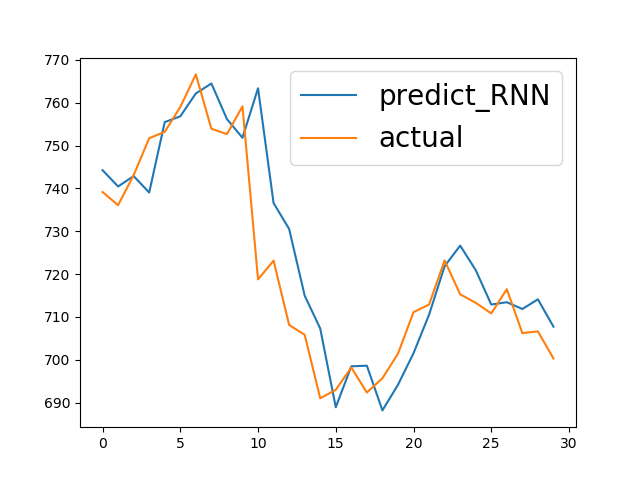

In [16]:
%matplotlib notebook
plt.figure()
plt.plot(predict1[:30], label = "predict_RNN")
plt.plot(actual[:30],label = "actual")

plt.legend(prop={'size': 20})